In [1]:
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy.linalg import inv, solve
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

import torch as th
from torch import nn, optim
import torch.nn.functional as F
from tqdm import tqdm_notebook as tqdm

# Train a simple NN on MNIST

In [2]:
# Hyperparameters
batch_size = 100
lrate = 1e-3
n_hidden = [512, 256]
n_epochs = 10

In [3]:
# 1. Get the data and prepare the data handling
import torchvision as tv
trafo = tv.transforms.Compose([tv.transforms.ToTensor(),
                               tv.transforms.Normalize((0.1307,), (0.3081,))])
train_loader = th.utils.data.DataLoader(
    tv.datasets.MNIST("./data", train=True, download=True, transform = trafo), 
                      batch_size=batch_size, shuffle=True)
test_loader = th.utils.data.DataLoader(
    tv.datasets.MNIST("./data", train=False, download=True, transform = trafo),
                     batch_size=batch_size, shuffle=False)

In [4]:
# 2. Define the model 
class TwoLayerNet(nn.Module):
    def __init__(self, n_neurons):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(784, n_neurons[0])
        self.fc2 = nn.Linear(n_neurons[0], n_neurons[1])
        self.fc3 = nn.Linear(n_neurons[1], 10)
    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out
net = TwoLayerNet(n_neurons=n_hidden)

net = nn.Sequential(nn.Linear(784, n_hidden[0]),
                    nn.ReLU(True),
                    nn.Linear(n_hidden[0], n_hidden[1]),
                    nn.ReLU(True),
                    nn.Linear(n_hidden[1], 10))
print(net)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU(inplace=True)
  (4): Linear(in_features=256, out_features=10, bias=True)
)


In [5]:
# 3. Define the optimizer and Loss
loss_fcn = nn.CrossEntropyLoss()  # Note: This already includes the softmax
optimizer = optim.Adam(net.parameters(), lr=lrate)

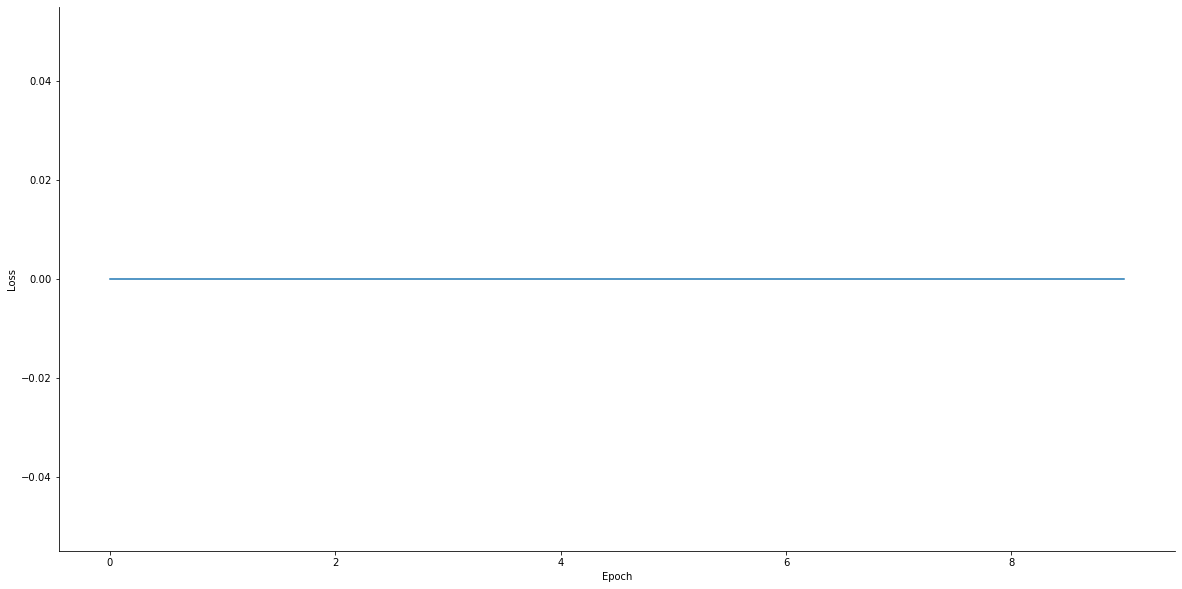

In [10]:
tot_loss = th.zeros(n_epochs)
for t in tqdm(range(n_epochs)):
    for data, target in tqdm(train_loader, leave=False):
        optimizer.zero_grad() 
        y_pred = net(data.view(-1, 784))
        loss = loss_fcn(y_pred, target)
        tot_loss[t] += loss.item()
        loss.backward()
        optimizer.step()
plt.plot(tot_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
sns.despine()

In [9]:
def eval_acc(net, data_loader):   
    n_pred = 0
    n_corr = 0
    with th.no_grad():
        for data, target in data_loader:
            pred = net(data.view(-1,784))
            n_corr += pred.argmax(1).eq(target).sum().item()
            n_pred += pred.shape[0]
    return n_corr/n_pred

In [11]:
print(f"Train Acc: {eval_acc(net, train_loader):.4f}")
print(f"Test Acc: {eval_acc(net, test_loader):.4f}")

Train Acc: 0.9974
Test Acc: 0.9846
